# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Various Patient attributes are captured in each row to provide more context to the patient appointments.(source: Kaggle.com)

- ScheduledDay: indicates the day the patient setup their appointment.
- Neighborhood: indicates hospital location.
- Age: indicates how old the patient is.
- Hipertension: indicates whether or not the patient is hypertensive (True or False).
- Diabetes: indicates whether or not the patient has diabetes (True or False).
- Alcoholism: indicates whether the patient is suffers from alcohol addiction (True or False).
- Handcap: indicates whether the patient is handcaped (True or False).
- SMS_received: Message reminder(s) sent to the patient (True or False)
- No-show: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
- Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### Questions to be answered
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
- Does the day of the week influence whether the patient shows up for their appointment or not?
- How does the time between scheduling and the actual appointment affect show up?
- Does receiving an SMS reminder impact patient turn up?

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df_appointment = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#investigating the datatypes of the features in the dataset
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can note that all datatypes are in order except for the ScheduledDay and AppointmentDay that might require adjustment to datetime based on the nature of analysis I intend to do.

This adjustment will facilitate an investigation of the distribution of the data around the days of the week to establish whether or not the day is of relevance.

In [5]:
#checking for missing values in the dataset
df_appointment.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We can see that the dataset is complete with all features having no missing data points. I will then proceed to the distribution of the data by taking a look at the summary stats, for starters.

In [6]:
#obtaining the summary stats from the data
df_appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the stats, we can see that the data points are well within range save for an instance where we have negative age.
This means we will need to further investigate the Age feature and clean it up.

In [7]:
#checking for duplicates in the dataset
df_appointment.duplicated().sum()

0

We can see that the dataset has no duplicates and as such this punctures the relevance of the PatientId and AppointmentId features in my analysis since I cannot establish a pattern for a particular patient.

I will have to drop these two columns as they will not contribute to the analysis.


### Data Cleaning
 

In [8]:
#Coverting the ScheduledDay and AppointmentDay datatypes to datatime to facilitate appointment analysis by days of the week
df_appointment['ScheduledDay'] = df_appointment['ScheduledDay'].astype('datetime64')
df_appointment['AppointmentDay'] = df_appointment['AppointmentDay'].astype('datetime64')

In [9]:
#confirming that the change has been effected.
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [10]:
#df_appointment['ScheduledDay'].dtypes == df_appointment['AppointmentDay'].dtypes 

I can see that the changes have been effected on the ScheduledDay and AppointmentDay features.

In [11]:
#dropping the features that are not necessary to my analysis
df_appointment.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [12]:
#confirming that the two features have been dropped
df_appointment.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#Investigating the Age feature 
age_below_zero = df_appointment['Age'] < 0
df_appointment[age_below_zero]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


We can see that it is a single data point that has an age below 0 and so we shall move to drop it as this will have minimal impact on our analysis.

In [14]:
#dropping the record with negative age
df_appointment.drop(df_appointment[age_below_zero].index, inplace=True)

In [15]:
#confirming that the record has been dropped
df_appointment[age_below_zero]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


The Age feature has been handled. I shall then dive into EDA. 

<a id='eda'></a>
## Exploratory Data Analysis

Defining a function that will be used to to facilitate visualization of the analysis for quick summary understanding of findings

In [16]:
#plotting function
def visualize(visual,xticklables,title,xlabel,ylabel):
    pt = visual
    pt.set_xticklabels(xticklables, rotation=0, ha='right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend();

### Research Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

calculating the correlation between all independent features with the predicted variable to understand the relationship, if any, will highlight the important features in predicting if a patient will show up for their scheduled appointment.

What this means is that I will need to endcode the target variable and then compute the correlation matrix.

In [17]:
#making a copy of the dataframe
df_appointment_updated = df_appointment.copy()
#label encoding the target variable
df_appointment_updated['No-show'].replace({'Yes': 0,'No':1}, inplace=True)
#label encoding the Gender feature
df_appointment_updated['Gender'].replace({'F': 0,'M':1}, inplace=True)
df_appointment_updated.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,0,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1
6,0,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,0,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0
8,0,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1
9,0,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1


The target variable has been encoded to reflect the appointments attended as 1 and those missed as 0. 
I shall then proceed with generating and plot the correlation maxtrix on a heatmap to facilitate easier interpretation.

In [18]:
#generating the correlation matrix
correlation_matrix = df_appointment_updated.corr()

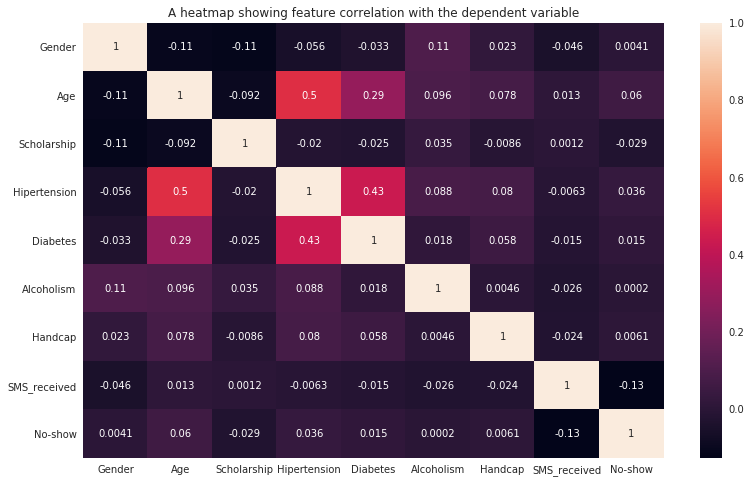

In [19]:
#plotting the correlation matrix on a heatmap
plt.subplots(figsize=(13,8))
sns.heatmap(correlation_matrix, annot=True).set(title="A heatmap showing feature correlation with the dependent variable");

From the correlation matrix, we can appreciate that the independent features have a weak correlation with the target variable. However, this is not conclusive and so I shall proceed to investigating the relationships between individual independent features with the predictated variable. 
Also, I believe that feature selection would do a great job in indentifying which features are more relevant to the prediction of patient show up based on more statistical tests.

### Research Question 2 : Does the day of the week influence whether the patient shows up for their appointment or not?

Here, my goal is to investigate the impact of appointmentday on the patient's decision to show up or not.

I will do this by extracting the days of the week from the AppointmentDay feature and then analyze patient behavior in relation to the same.

In [20]:
#creating a new day feature by extracting the days of the week from the AppointmentDay 
df_appointment_updated['days'] = df_appointment_updated['AppointmentDay'].dt.day_name()
df_appointment_updated.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday


A new feature called days showing the day of the week for the appointment has been created. I will proceed to extract and visualize the data in two categories: 1. Appointments met by day and 2. Appointments skipped by day 

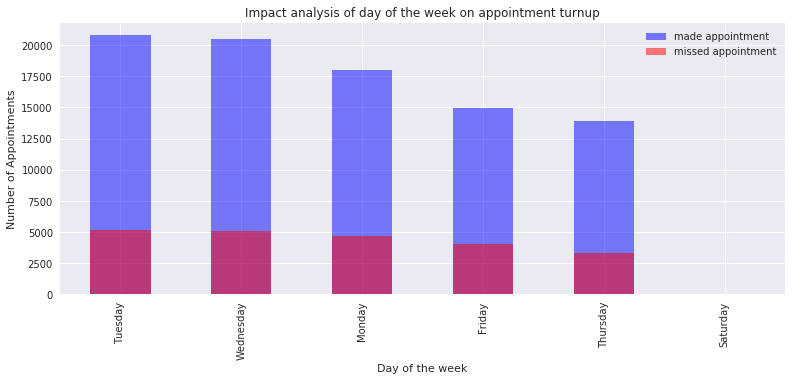

In [21]:
#mask for patients that made the appointment
appointment_made = df_appointment_updated['No-show'] == True
#mask for those that missed the appointment
appointment_missed = df_appointment_updated['No-show'] == False

#Visualizing the met and skipped appointments by day of the week
plt.subplots(figsize=(13,5))
df_appointment_updated.days[appointment_made].value_counts().plot(kind='bar',label="made appointment",alpha=0.5, color='blue')
df_appointment_updated.days[appointment_missed].value_counts().plot(kind='bar',label="missed appointment",alpha=0.5, color='red',)
#labeling chart area
plt.title("Impact analysis of day of the week on appointment turnup")
plt.xlabel("Day of the week")
plt.ylabel("Number of Appointments")
plt.legend();

In [22]:
df_appointment_updated.days[appointment_made].value_counts()


Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: days, dtype: int64

In [23]:
df_appointment_updated.days[appointment_missed].value_counts()

Tuesday      5152
Wednesday    5093
Monday       4690
Friday       4037
Thursday     3338
Saturday        9
Name: days, dtype: int64

In a bid to understand how the days of the week affect the patient turn up for appointments, we discover that the highest turn up is on Wednesday, followed by Tuesday and Monday with the lowest being on Saturday. For the appointments skipped, Tuesday takes the lead, followed by Wednesday and Monday with Saturday at the bottom. Looking at this analysis together, we can see that the attendance percentages are close to each other for days like Wednesday, Tuesday and Saturday which is close to 80% meaning that on approximately 20% of the patients didn't show up for their appointments. 


### Research Question 3: How does the time between scheduling and the actual appointment affect show up?

The average time between the scheduleDay and AppointmentDay will give insights into whether this affects the rate of making appointments and as such we shall be calculating the average time difference between the schedule day and appointment day in terms of days. 

In [24]:
#Calculating the time difference
df_appointment_updated['time_difference'] = df_appointment_updated['AppointmentDay']-df_appointment_updated['ScheduledDay']
df_appointment_updated.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days,time_difference
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,-1 days +05:21:52
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,-1 days +07:51:33
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,-1 days +07:40:56
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,-1 days +06:30:29
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,-1 days +07:52:37


A new feature is created to house the time difference between schedule day and appointment day from which the average time difference shall be calculated for the patients that missed their appointment and those that made it.

In [25]:
#Calculating the average time difference for patients that attended their appointments
time_difference_made = df_appointment_updated.time_difference[appointment_made].mean()
time_difference_made = time_difference_made.days
#Calculating the average time difference for patients that missed their appointments
time_difference_missed = df_appointment_updated.time_difference[appointment_missed].mean()
time_difference_missed =time_difference_missed.days

time_difference_made , time_difference_missed

(8, 15)

Upon finding the average time difference (days) between the schedule day and appointment day for patients that turned up and those that missed their appointment, its evident that the patient turn up was greater with smaller times between the schedule and appointment day. We can further appreciate these findings by visualizing the average time difference for both categories.

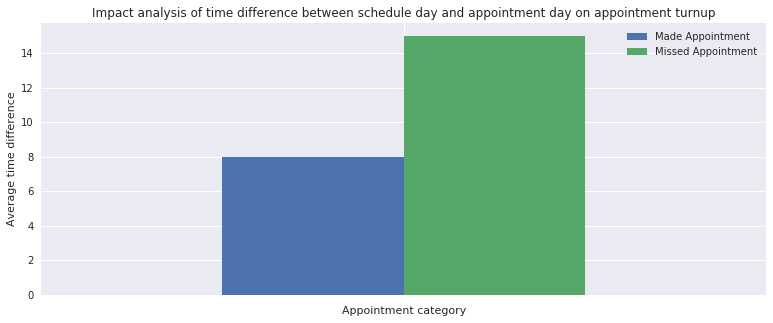

In [26]:
#Visualizing the impact of average time difference on appointment turnup
time_differences={"Made Appointment":[time_difference_made], "Missed Appointment": [time_difference_missed]}
visualize(pd.DataFrame.from_dict(time_differences).plot(kind='bar',figsize=(13,5)),
         [''],
         "Impact analysis of time difference between schedule day and appointment day on appointment turnup",
         "Appointment category",
         "Average time difference"
         )

As earlier highlighted, we can confirm visually that the time between making the appointment and turning up for that appointment impacts patient turn up for appointments.

### Research Question 4: Does receiving an SMS reminder impact patient turn up?

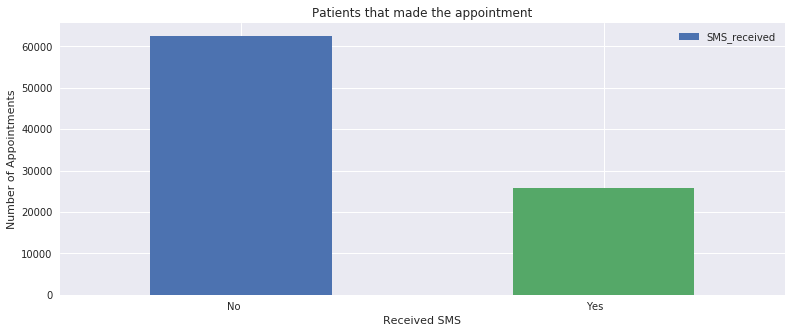

In [27]:
#looking at patients that turned up for their appointmet
visualize(df_appointment_updated.SMS_received[appointment_made].value_counts().plot(kind='bar',figsize=(13,5)),
         ['No','Yes'],
         "Patients that made the appointment",
         "Received SMS",
         "Number of Appointments"
         )

From the visualization, we can see that the number of patients that didnt receive SMS reminders but still turned up for their appointments are almost 3 times those that received the SMS. What this could single out is that the perhaps reception of the SMS had less impact on the turn up than anticipated.

We shall take a look at the category that missed their appointments in relation to the SMS reminder.

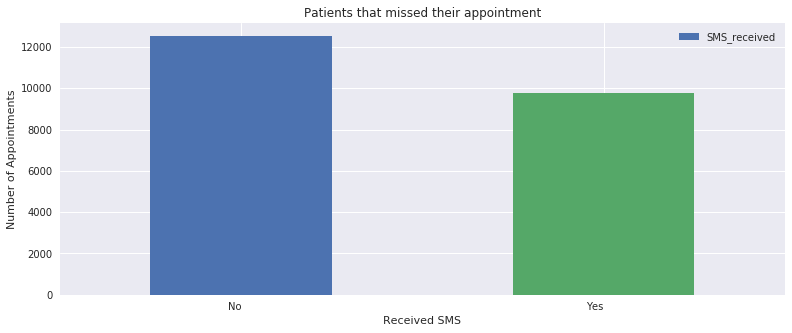

In [28]:
#looking at patients that missed their appointmet
visualize(df_appointment_updated.SMS_received[appointment_missed].value_counts().plot(kind='bar',figsize=(13,5)),
         ['No','Yes'],
         "Patients that missed their appointment",
         "Received SMS",
         "Number of Appointments"
         )

From the visualization, we can see that the number of patients that didnt receive SMS reminders but still skipped their appointments is greater than those that received the SMS and bailed on the appointment. This provides an alternative theory to what we have seen with similar analysis on the patients that attended their appointments.

<a id='conclusions'></a>
## Conclusions

#### Findings
- A bigger number of patients turn up for their appointment with those that turn up being approximately 4 times the number of those that skip their appointments.
- Most patients attend appointments scheduled for Wednesday and Tuesday with Saturday having the least number of appointments scheduled. The turn up rate, however, stands at approximately 80%  for individual days of the week.
- Average time between scheduling an appointment and attending to it affects patient turn up as patients that made the appoint have an average time of 8 days whereas those that bailed on their appointment have 15days as average time.
- The SMS reminders do not seem to have significant impact on the show up rate as more patients that showed up didn't recieve SMS reminders.

#### Limitations
- The dataset does not contain the appointment time which would help in studying the hourly impact on the show up rate for instance, would we have more turn up if the appointment is in the morning? Evening? or at night?
- The dataset does not contain the patient location which makes the study of impact of hospital location to the show up rate impossible. Questions like Is the distance from the patients location to the hospital a show stopper? cannot be answered.
- The dataset contains data for a few months which makes it hard to analyse the impact of seasons on the show up rate as well as the nature of appointments made.

#### Areas of further research
- More analysis can be made by looking at features such as hypertension, Diabetes and other diseases on the number of appointments made as well as the show up rate.
- It would be interesting looking at the weather seasons of the year in Brazil with reference to the hospital locations and how this affects patient turn up for appointments. Perhaps more appointments are missed in the rainy season! 

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0